\newpage

### 1

The goal is to predict the presence of heart disease in patients based on their medical attributes. This is a binary classification problem, where:

Class 0 (No Heart Disease): Patients with num = 0 (no heart disease).

Class 1 (Heart Disease): Patients with num $\neq 0$.

### 2

The dataset required several key transformations: missing values in ca and thal were dropped , the target variable num was binarized (0 for no heart disease, 1 for presence).

### 3

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [19]:
dataset = pd.read_csv("https://raw.githubusercontent.com/PratheepaJ/datasets/refs/heads/master/ass6-dataset.csv")
dataset.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [20]:
dataset.shape

(303, 14)

In [21]:
dataset.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000,301.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438,1.939706,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


In [22]:
dataset.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
num         0
dtype: int64

The dataset contains 303 patient records with 14 features related to heart disease.  There are a few missing values in 'ca' (4 missing) and 'thal' (2 missing). The mean of 'num' (heart disease severity) is 0.94, the mean age is 54.

### 4

In [23]:
dataset['target'] = dataset['num'].apply(lambda x: 1 if x > 0 else 0)

### 5

In [24]:

corr_matrix = dataset.corr()
corr_matrix['target'].sort_values(ascending=False)[1:6]

num        0.830081
thal       0.525689
ca         0.460442
exang      0.431894
oldpeak    0.424510
Name: target, dtype: float64

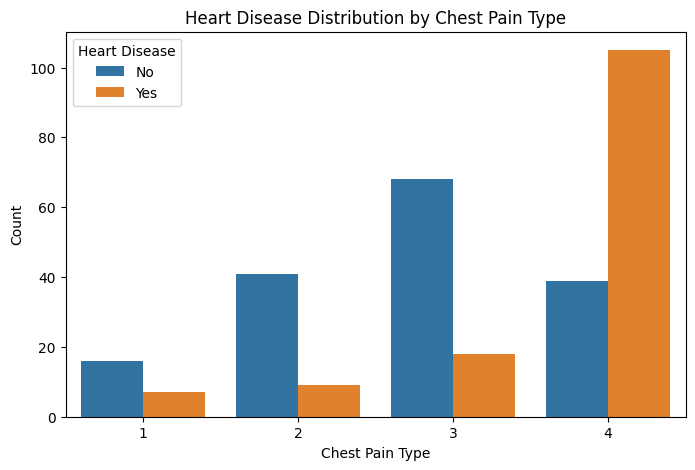

In [25]:
# visualize relationship between chest pain type and heart disease
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=dataset)
plt.title('Heart Disease Distribution by Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

The correlation analysis shows that thal has the strongest positive relationship with the new binary target (0.53). The next strongest predictors are ca (0.46), exang (0.43), and oldpeak (0.42).

The barchart suggest that the chest pain type is associated with the heart disease.

### 6

In [26]:
dataset = dataset.dropna()
dataset.shape

(297, 15)

After removing missing values, there are 297 observations left.

### 7

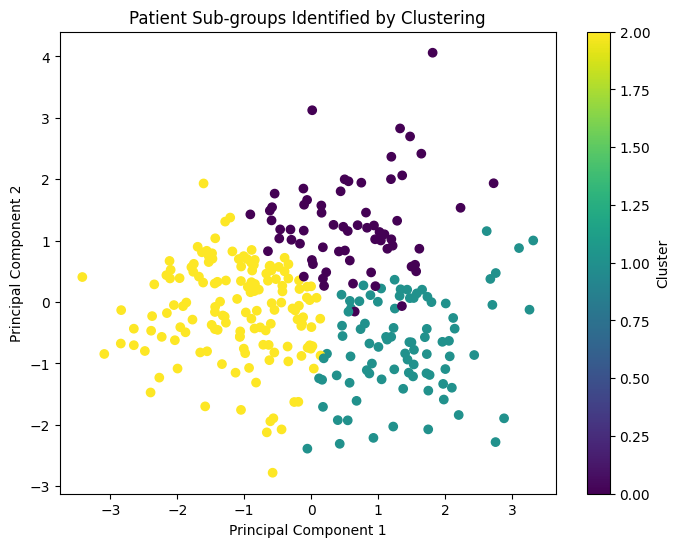

,age,trestbps,chol,thalach,oldpeak
cluster,,,,,
0,60.815385,143.707692,296.984615,155.492308,0.649231
1,59.563218,136.379310,242.137931,126.206897,2.213793
2,48.717241,123.496552,228.227586,160.993103,0.542759


In [27]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
X_cluster = dataset[numerical_cols]

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=1)
clusters = kmeans.fit_predict(X_scaled)

# visualize clusters using PCA for dimensionality reduction
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.title('Patient Sub-groups Identified by Clustering')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

# add clusters to dataframe for analysis
dataset['cluster'] = clusters
dataset.groupby('cluster')[numerical_cols].mean()

### 8 

In [28]:
X = dataset.drop(['num', 'target', 'cluster'], axis=1)
y = dataset['target']

# split data into train (70%) and test (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

Training set shape: (207, 13)
Test set shape: (90, 13)


### 9

I will choose Logistic regression and Naive Bayes model.

Logistic Regression is an excellent choice due to its simplicity, interpretability, and effectiveness in binary classification problems.

Naive Bayes is another suitable classifier, particularly because of its computational efficiency and strong performance on smaller datasets like this one.

### 10

To compare the performance of Logistic Regression and Naive Bayes classifiers, we can use Accuracy and F1-Score.

The accuracy measures the proportion of correctly classified instances out of the total predictions, the formula is Accuracy= 
(TP+TN)/(TP+TN+FP+FN).

F1-Score is the harmonic mean of precision and recall, balancing false positives and false negatives. The formula is F1-Score=2×(Precision×Recall)/(Precision+Recall).


### 11

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  
    'solver': ['liblinear', 'saga'] 
}

log_reg = LogisticRegression(max_iter=10000)

# perform grid search to find the best parameters
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='accuracy')
grid_search_lr.fit(X_train, y_train)

# best parameters for Logistic Regression
best_params_lr = grid_search_lr.best_params_
print("Best parameters for Logistic Regression:", best_params_lr)

Best parameters for Logistic Regression: {'C': 1, 'solver': 'liblinear'}


In [38]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

### 12

In [39]:
from sklearn.feature_selection import RFE
log_reg_best = LogisticRegression(**best_params_lr, max_iter=1000)
rfe = RFE(estimator=log_reg_best, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)
log_reg_rfe = LogisticRegression(**best_params_lr, max_iter=1000)
log_reg_rfe.fit(X_train_rfe, y_train)

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

### 13

In [40]:
from sklearn.metrics import accuracy_score, f1_score
y_pred_lr = grid_search_lr.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
f1_lr = f1_score(y_test, y_pred_lr)
print("Logistic Regression Accuracy:", accuracy_lr)
print("Logistic Regression F1-Score:", f1_lr)

Logistic Regression Accuracy: 0.8222222222222222
Logistic Regression F1-Score: 0.8048780487804879


In [41]:
y_pred_nb = nb.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)
f1_nb = f1_score(y_test, y_pred_nb)
print("Naive Bayes Accuracy:", accuracy_nb)
print("Naive Bayes F1-Score:", f1_nb)

Naive Bayes Accuracy: 0.8555555555555555
Naive Bayes F1-Score: 0.8354430379746836


In [42]:
y_pred_lr_rfe = log_reg_rfe.predict(X_test_rfe)

accuracy_lr_rfe = accuracy_score(y_test, y_pred_lr_rfe)
f1_lr_rfe = f1_score(y_test, y_pred_lr_rfe)
print("Logistic Regression with RFE Accuracy:", accuracy_lr_rfe)
print("Logistic Regression with RFE F1-Score:", f1_lr_rfe)

Logistic Regression with RFE Accuracy: 0.7444444444444445
Logistic Regression with RFE F1-Score: 0.7160493827160493


The Naive Bayes model has the best performance, since it has the largest accuracy and F1-score compared with two logistic regression models. The logistic regression with RFE seems to have a worse performance compared with the logistic regression without RFE, thus RFE decreases the performance.

### 14

In [45]:
coefficients = log_reg_rfe.coef_[0]
feature_names = X_train.columns[rfe.support_]
df = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
df = df.sort_values(by='Coefficient', ascending=False)
df

,Feature,Coefficient
2,exang,1.346090
4,ca,1.157569
0,sex,1.109074
3,oldpeak,0.668385
1,fbs,-0.843306


The most important predictor variables identified by the Logistic Regression model with RFE are exang, ca, and sex. The positive coefficients for exang (1.346) and ca (1.158) indicate that exercise-induced angina and the number of major vessels colored by fluoroscopy significantly increase the likelihood of heart disease. 

### 15

In [51]:
subgroup_accuracies = []
subgroup_f1_scores = []
for cluster in dataset['cluster'].unique():
    subgroup_data = dataset[dataset['cluster'] == cluster]
    X_subgroup = subgroup_data.drop(['target', 'num', 'cluster'], axis=1)
    y_subgroup = subgroup_data['target']
    X_train_subgroup, X_test_subgroup, y_train_subgroup, y_test_subgroup = train_test_split(
        X_subgroup, y_subgroup, test_size=0.3, random_state=1
    )
    log_reg_subgroup = LogisticRegression(max_iter=1000)
    log_reg_subgroup.fit(X_train_subgroup, y_train_subgroup)
    y_pred_subgroup = log_reg_subgroup.predict(X_test_subgroup)
    accuracy_subgroup = accuracy_score(y_test_subgroup, y_pred_subgroup)
    f1_subgroup = f1_score(y_test_subgroup, y_pred_subgroup)
    subgroup_accuracies.append(accuracy_subgroup)
    subgroup_f1_scores.append(f1_subgroup)
average_subgroup_accuracy = np.mean(subgroup_accuracies)
average_subgroup_f1 = np.mean(subgroup_f1_scores)
print("Average Subgroup Logistic Regression Accuracy:", average_subgroup_accuracy)
print("Average Subgroup Logistic Regression F1 - Score:", average_subgroup_f1)

Average Subgroup Logistic Regression Accuracy: 0.7443322109988776
Average Subgroup Logistic Regression F1 - Score: 0.7066948555320648


The fourth classifier, achieved lower overall performance (Accuracy: 0.74, F1-score: 0.71) compared to the Naive Bayes model in (13) (Accuracy: 0.86, F1-score: 0.84). This suggests that clustering did not improve performance in this case.

### 16
Yubing Lin  400379832: Q1- Q10

Jieheng Zhao  400364935: Q11-Q17

### 17

https://github.com/sbb438/assignment6